In [13]:
import torch
import arviz as az
from scipy.optimize import curve_fit
from bokeh.plotting import figure, show,output_file, save
from bokeh.transform import factor_cmap, factor_mark
from bokeh.palettes import Spectral
from bokeh.models import Slope, Div
from bokeh.io import curdoc,output_notebook,export_png
from bokeh.layouts import column,gridplot
from print_versions import print_versions
from sklearn.metrics import r2_score
from seaborn import clustermap
from bokeh.models import Band, ColumnDataSource
import pandas as pd
output_notebook()
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,examine,help"
import numpy as np

Loading BokehJS ...

In [14]:
gpr_acetone=torch.load("../models/acetone_seasonality",weights_only=False,map_location='cuda')
gpr_form=torch.load("../models/form_seasonality",weights_only=False,map_location='cuda')
gpr_acetald=torch.load("../models/acetald_seasonality",weights_only=False,map_location='cuda')

In [15]:
gpr_bc=torch.load("../models/bc_seasonality",weights_only=False,map_location='cuda')
gpr_pm=torch.load("../models/pm25_seasonality",weights_only=False,map_location='cuda')
gpr_no2=torch.load("../models/no2_seasonality",weights_only=False,map_location='cuda')
gpr_nox=torch.load("../models/nox_seasonality",weights_only=False,map_location='cuda')

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [17]:
x=np.linspace(0,53,1000)
x_tor=torch.tensor(x).float().to(device)
data=pd.DataFrame(x,index=np.arange(1000),columns=["week"])
data["scale_form"]=gpr_form.to(device)(x_tor)[0].cpu().detach().numpy()
data["scale_acetald"]=gpr_acetald.to(device)(x_tor)[0].cpu().detach().numpy()
data["scale_acetone"]=gpr_acetone.to(device)(x_tor)[0].cpu().detach().numpy()
data["scale_pm25"]=gpr_pm.to(device)(x_tor)[0].cpu().detach().numpy()
data["scale_bc"]=gpr_bc.to(device)(x_tor)[0].cpu().detach().numpy()
data["scale_no2"]=gpr_no2.to(device)(x_tor)[0].cpu().detach().numpy()
data["scale_nox"]=gpr_nox.to(device)(x_tor)[0].cpu().detach().numpy()

In [18]:
p = figure(title = "Penguin size", background_fill_color="#fafafa",tools=TOOLS,x_range=(0.8,2.5),y_range=(0.8,2.5))

p.line(data.scale_form, data.scale_acetald, line_color="blue",
        line_width=3, legend_label="formaldehyde_versus_acetald")
p.line(data.scale_acetone, data.scale_form, line_color="red",
        line_width=3, legend_label="acetone_versus_formaldehyde")
p.line(data.scale_acetone, data.scale_acetald, line_color="green",
        line_width=3, legend_label="aceton_versus_acetald")
p.xaxis.axis_label = r'$$Scale on season$$'
p.yaxis.axis_label = r'$$Scale\_black\_carbon$$'
p.xaxis.axis_label_text_font_size = "14px"
p.yaxis.axis_label_text_font_size = "16px"
p.yaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_style = "bold"
p = figure(title = "Penguin size", background_fill_color="#fafafa",tools=TOOLS,x_range=(0.8,2.5),y_range=(0.8,2.5))

p.line(data.scale_form, data.scale_acetald, line_color="blue",
        line_width=3, legend_label="formaldehyde_versus_acetald")
p.line(data.scale_acetone, data.scale_form, line_color="red",
        line_width=3, legend_label="acetone_versus_formaldehyde")
p.line(data.scale_acetone, data.scale_acetald, line_color="green",
        line_width=3, legend_label="aceton_versus_acetald")
p.xaxis.axis_label = r'$$Scale on season$$'
p.yaxis.axis_label = r'$$Scale\_black\_carbon$$'
p.xaxis.axis_label_text_font_size = "14px"
p.yaxis.axis_label_text_font_size = "16px"
p.yaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_style = "bold"
show(p)

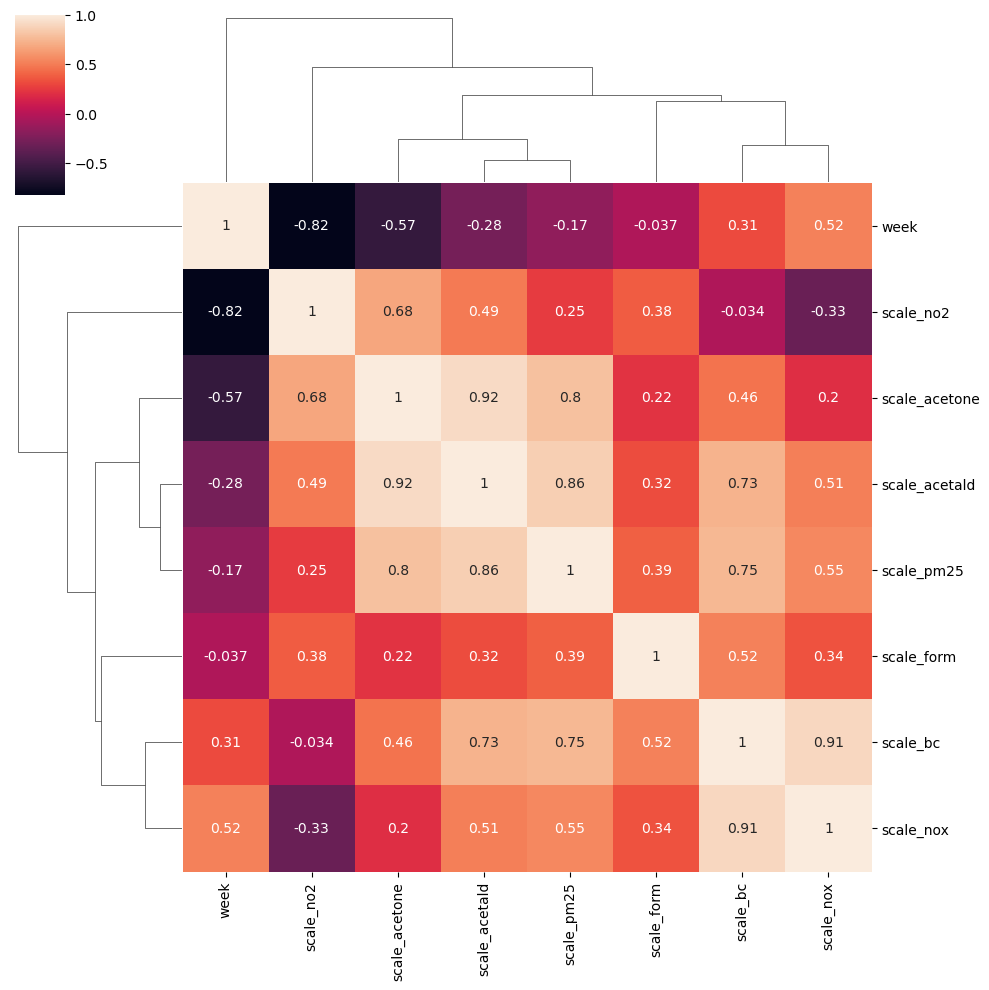

In [19]:
clustermap(data.corr(),annot=True)